In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

# !pip install -q tensorflow==2.0.0-alpha0
# import tensorflow as tf
!pip install segmentation-models

import numpy as np
import matplotlib.pyplot as plt
import os
from PIL import Image
import keras
from keras.models import Model
from keras.layers import Conv2D, MaxPooling2D, Input, Conv2DTranspose, Concatenate, BatchNormalization, UpSampling2D
from keras.layers import  Dropout, Activation
from keras.optimizers import Adam, SGD
from keras.layers.advanced_activations import LeakyReLU
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
from keras import backend as K
from keras.utils import plot_model
import tensorflow as tf
import glob
import random
from random import shuffle
import scipy.io as spio
from segmentation_models import Unet
from segmentation_models.backbones import get_preprocessing
from segmentation_models.losses import bce_jaccard_loss
from segmentation_models.metrics import iou_score
from keras.models import load_model
import h5py
BACKBONE = 'resnet34'


Using TensorFlow backend.
C:\Users\shayna\Anaconda3\envs\venvgpu\lib\site-packages\classification_models\resnext\__init__.py:4: UserWarning: Current ResNext models are deprecated, use keras.applications ResNeXt models
  warnings.warn('Current ResNext models are deprecated, '


In [2]:
models=load_model('model_train.h5')

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


In [64]:
mat = spio.loadmat('adtfd_real_128.mat', squeeze_me=True)

df_test=mat['yy']
print(df_test[:,:,:,1].shape)


(2, 128, 128)


In [65]:
df2=df_test[:,:,:,:]
#df2=np.expand_dims(df2,axis=4)
yy=np.zeros((2,128,128))
yy=models.predict(df2)

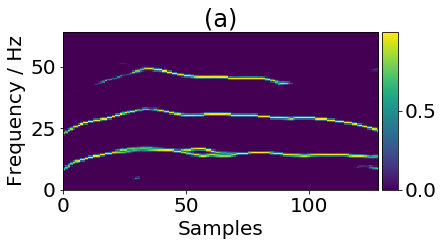

In [66]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
yy=yy.clip([0, abs(yy.max())])
#plt.imshow(df[33,:,:,0])
fig2=plt.figure()
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20) 
plt.title("(a)",fontsize=24)
plt.xlabel('Samples',fontsize=20)
plt.ylabel('Frequency / Hz',fontsize=20)
ax=plt.gca()
im=ax.imshow((yy[0,:,:,0]),origin='lower', extent=[0, 128, 0, 64])
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im, cax=cax)
plt.savefig('Multipleview.png',dpi=800,bbox_inches='tight')

In [67]:
spio.savemat('resultRealMultiple.mat',{'yy':yy})

In [7]:
model=load_model('model_train_single.h5')

In [60]:
mat = spio.loadmat('adtfd_real_128.mat', squeeze_me=True)

df_test=mat['zz']
print(df_test[:,:,:,1].shape)


(2, 128, 128)


In [68]:
df2=df_test[:,:,:,:]
#df2=np.expand_dims(df2,axis=4)
yy=np.zeros((2,128,128))
yy=model.predict(df2)

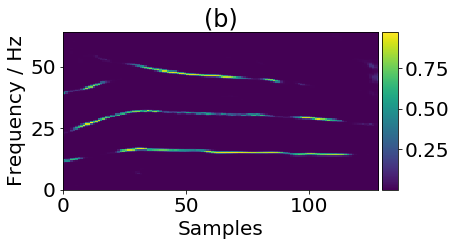

In [69]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
yy=yy.clip([0, abs(yy.max())])
#plt.imshow(df[33,:,:,0])
fig2=plt.figure()
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20) 
plt.title("(b)",fontsize=24)
plt.xlabel('Samples',fontsize=20)
plt.ylabel('Frequency / Hz',fontsize=20)
ax=plt.gca()
im=ax.imshow((yy[0,:,:,0]),origin='lower', extent=[0, 128, 0, 64])
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im, cax=cax)
plt.savefig('SingleVieqw.png',dpi=800,bbox_inches='tight')

In [70]:
spio.savemat('resultRealSingle.mat',{'yy':yy})